# Intro to Scientific Programming
By G Hosseinzadeh 2025 Apr 15

Let's imagine you want to generate synthetic spectra of different types of stars. The figure below shows approximate temperature and radius ranges for each type. In reality they have some absorption lines (shown at left), but for now let's approximate them as perfect blackbody emitters.

The Planck function gives the spectral radiance $(B_\lambda \equiv \frac{dE}{dt\,d\lambda\,dA\,d\Omega})$ of the stellar photosphere for a given temperature:
$$B_\lambda = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1}$$

Spectral flux $(F_\lambda \equiv \frac{dE}{dt\,d\lambda\,dA})$ is the integral of the component of the spectral radiance **in the direction of the observer** $(\cos\theta)$:
$$F_\lambda = \iint B_\lambda \cos\theta \,d\Omega = B_\lambda \int_0^{2\pi} \int_0^{\pi/2} \cos\theta \sin\theta \,d\theta \,d\phi = \pi B_\lambda$$

Spectral luminosity $(L_\lambda \equiv \frac{dE}{dt\,d\lambda})$ is the integral over the surface area of the stellar photosphere:
$$L_\lambda = \iint F_\lambda \,dA = F_\lambda \int_0^{2\pi} \int_{0}^{\pi} R^2 \sin\theta \,d\theta \,d\phi = 4 \pi R^2 F_\lambda$$

Put that all together:
$$L_\lambda = \frac{8 \pi^2 R^2 h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1}$$

This gives you the spectral luminosity as a function of wavelength $\lambda$ for a star with temperature $T$ and radius $R$. We're going to implement this equation in Python in three different ways:
* using only the built-in math module (this contains the constant $\pi$ and the exponential function)
* using NumPy arrays
* using Astropy quantities

Then calculate spectra for each of the 7 classes of stars (OBAFGKM). In each case, plot the resulting spectra ($L_\lambda$ vs. $\lambda$) to check your work. (Hint: a logarithmic $y$-axis might help.)

In [19]:
import matplotlib.pyplot as plt  # we'll learn more about this next time; for now just use plt.plot(x, y)

![main sequence stars](https://upload.wikimedia.org/wikipedia/commons/3/37/Stellar_Classification_Chart.png)  
Credit: Pablo Carlos Budassi (Wikimedia.org)

## Using only the built-in math module

In [20]:
import math

# physical constants
R_SUN = 6.96e8  # m
C_LIGHT = 3.00e8  # m / s
H_PLANCK = 6.63e-34  # J / Hz
K_BOLTZMANN = 1.38e-23  # J / K

In [21]:
wavelengths =  list(range(900,200,-10))

temperatures =  [3500, (30000+9700)/2,(9700+7200)/2,(7200+5700)/2,(5700+4900)/2,(4900+3400)/2,(3400+2100)/2]
radii =  [7.0,(6.6+1.8)/2,(1.8+1.4)/2,(1.4+1.1)/2,(1.1+0.9)/2,(0.9+0.7)/2,(0.6)]

In [37]:
L = []
for i in list(range(0,7)):
    rad = radii[i]
    temp = temperatures[i]
    L_i = []
    for lambd_m in wavelengths:
        lambd = lambd_m * 1e-9
        exponent = (H_PLANCK * C_LIGHT) / (lambd * K_BOLTZMANN * temp)
        L_l = (8 * math.pi**2 * (rad * R_SUN)**2 * H_PLANCK * C_LIGHT**2 / lambd**5) / (math.exp(exponent) - 1)
        L_i.append(L_l)
    L.append(L_i)


TypeError: only dimensionless scalar quantities can be converted to Python scalars

In [23]:
names = ['O','B','A','F','G','K','M']

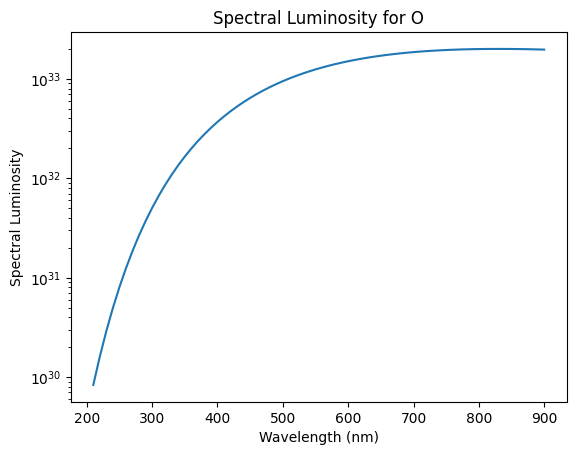

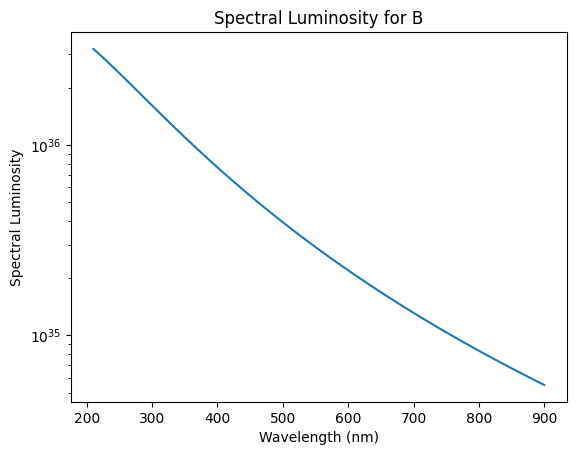

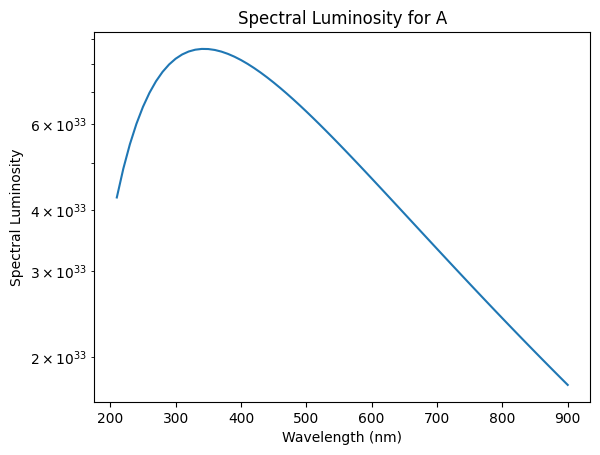

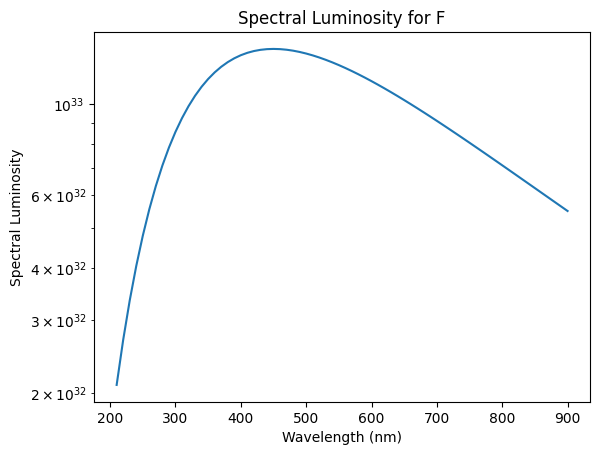

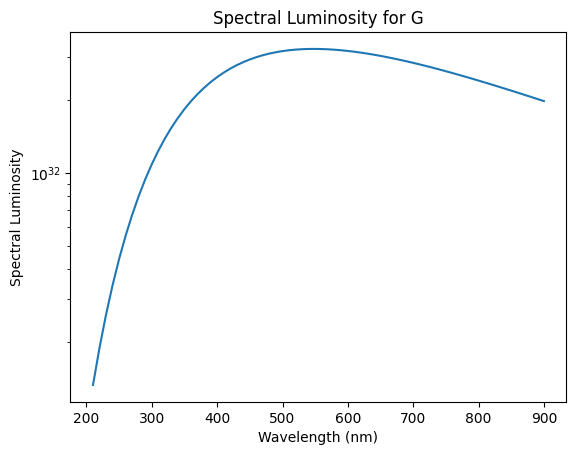

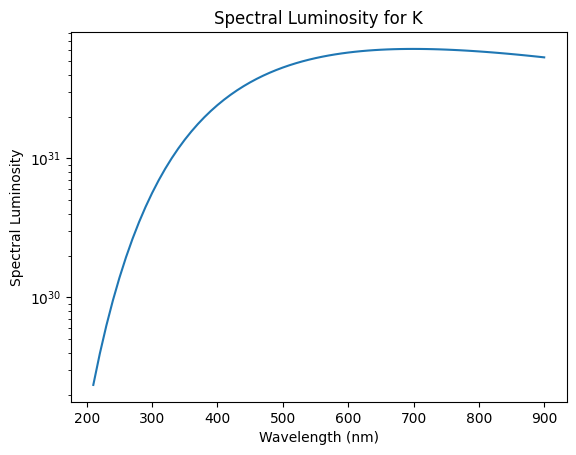

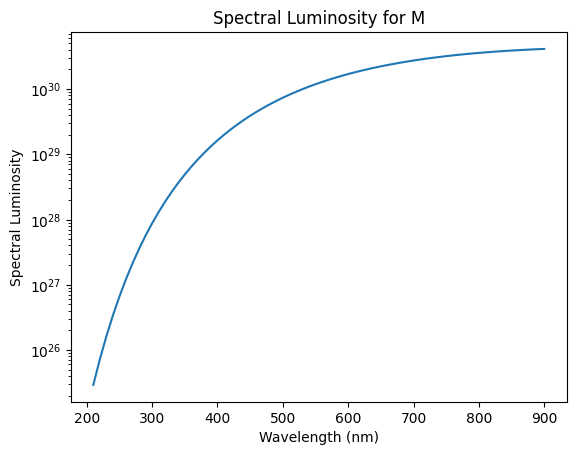

In [24]:
for j in range(7):
    name = names[j]
    plt.plot(wavelengths, L[j])
    plt.yscale('log')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Luminosity')
    plt.title(f"Spectral Luminosity for {name}")
    plt.show()


## Now with NumPy Arrays

In [22]:
import numpy as np

In [23]:
wavelengths = np.arange(900, 200, -10)
temperatures = np.array([3500, (30000+9700)/2, (9700+7200)/2, (7200+5700)/2, (5700+4900)/2, (4900+3400)/2, (3400+2100)/2])
radii = np.array([7.0, (6.6+1.8)/2, (1.8+1.4)/2, (1.4+1.1)/2, (1.1+0.9)/2, (0.9+0.7)/2, 0.6])
wavelengths_m = wavelengths * 1e-9


In [39]:
L_np = np.zeros((7, len(wavelengths_m)))
for i in range(7):
    rad = radii[i]
    temp = temperatures[i]
    lambd = wavelengths_m
    exponent = (H_PLANCK * C_LIGHT) / (lambd * K_BOLTZMANN * temp)
    L_np[i] = (8 * np.pi**2 * (rad * R_SUN)**2 * H_PLANCK * C_LIGHT**2 / lambd**5) / (np.exp(exponent) - 1)

UnitTypeError: Can only apply 'exp' function to dimensionless quantities

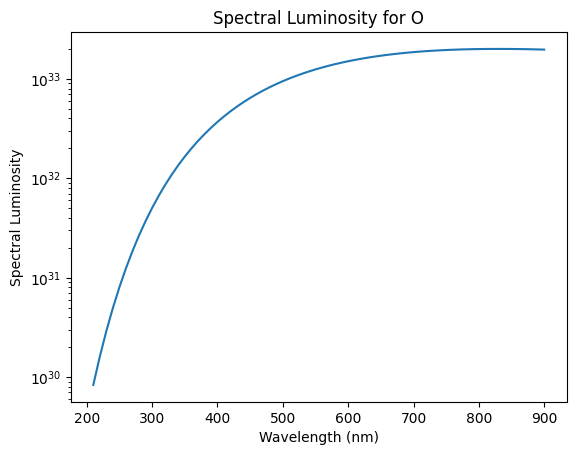

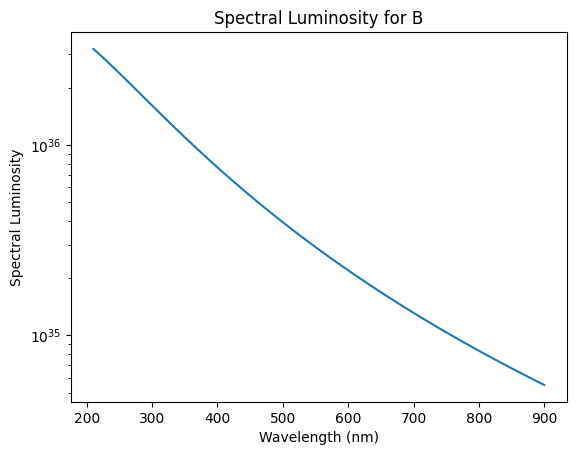

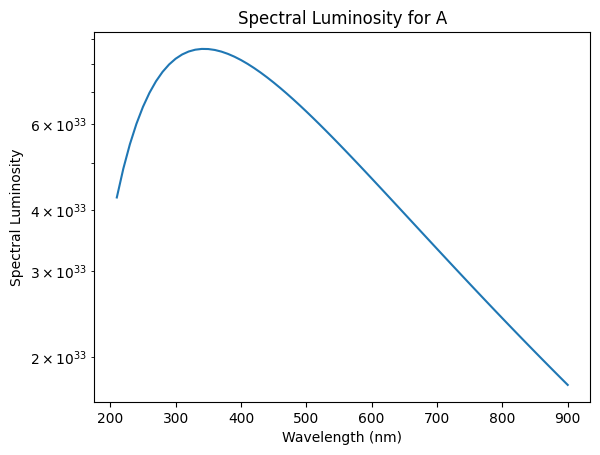

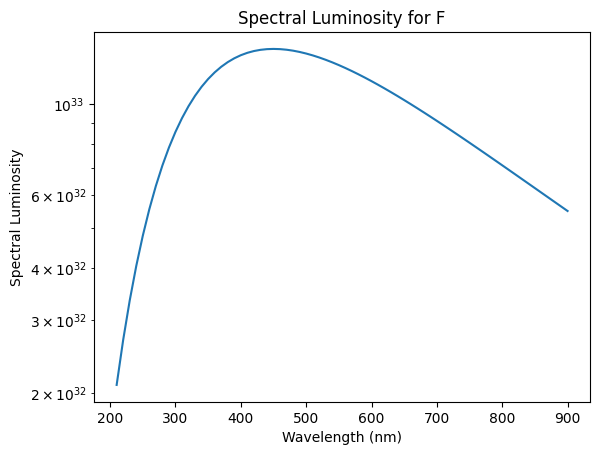

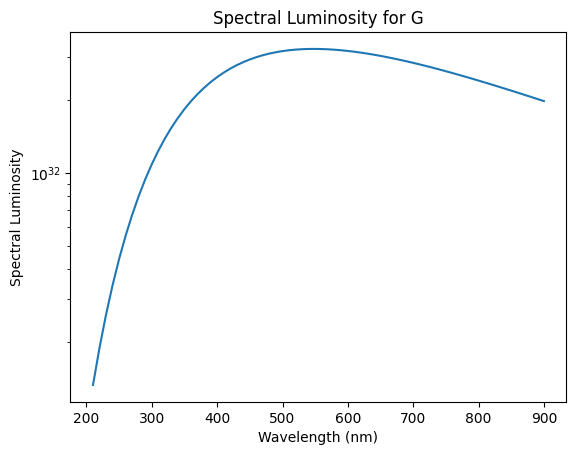

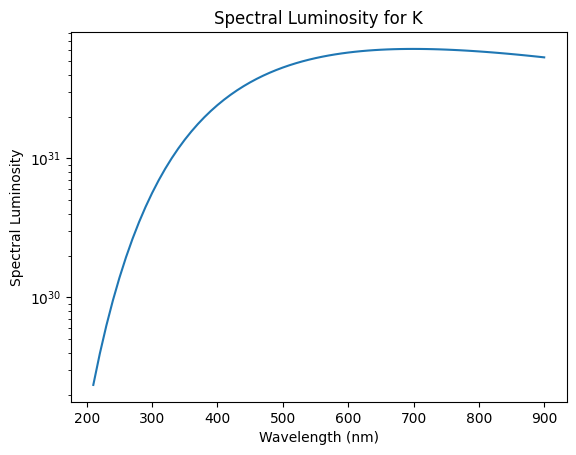

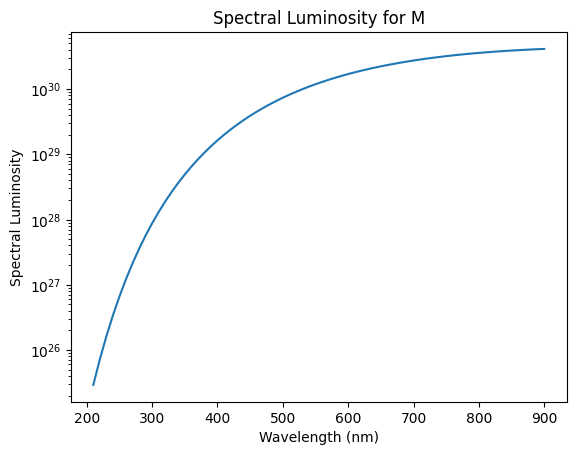

In [26]:
for j in range(7):
    name = names[j]
    plt.plot(wavelengths, L_np[j])
    plt.yscale('log')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Luminosity')
    plt.title(f"Spectral Luminosity for {name}")  
    plt.show()


## Now with Astropy Quantities

In [25]:
from astropy import units as u
from astropy import constants as const
from astropy.visualization import quantity_support
quantity_support()  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f63b52a2120>

In [40]:
wavelengths = np.arange(900, 200, -1) * u.nm #setting the units to nm
wavelengths_m = wavelengths.to(u.m) #converting to m !
temperatures = np.array([3500, (30000+9700)/2, (9700+7200)/2, (7200+5700)/2, (5700+4900)/2, (4900+3400)/2, (3400+2100)/2]) * u.K
radii = np.array([7.0, (6.6+1.8)/2, (1.8+1.4)/2, (1.4+1.1)/2, (1.1+0.9)/2, (0.9+0.7)/2, 0.6]) * const.R_sun

In [42]:
%%timeit
L_astropy = []
for i in range(7):
    R = radii[i]
    T = temperatures[i]
    lam = wavelengths_m
    exponent = (const.h * const.c) / (lam * const.k_B * T)
    L_l = (8 * np.pi**2 * R**2 * const.h * const.c**2 / lam**5) / (np.exp(exponent) - 1)
    L_astropy.append(L_l)

2.65 ms ± 90 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


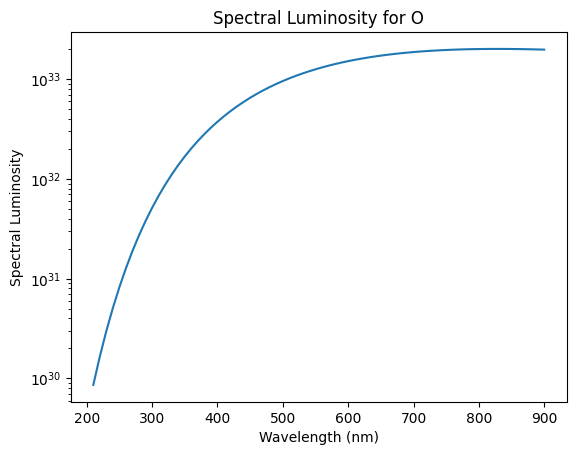

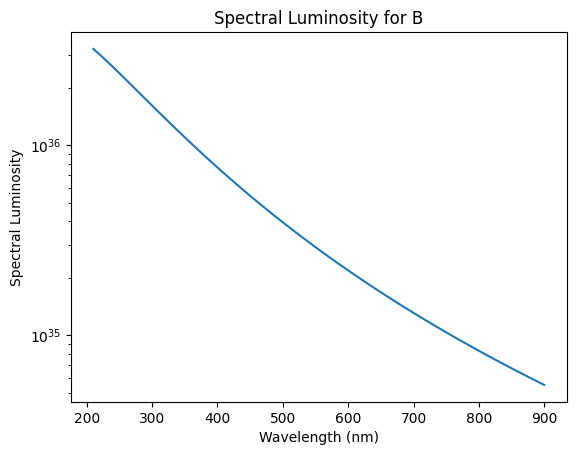

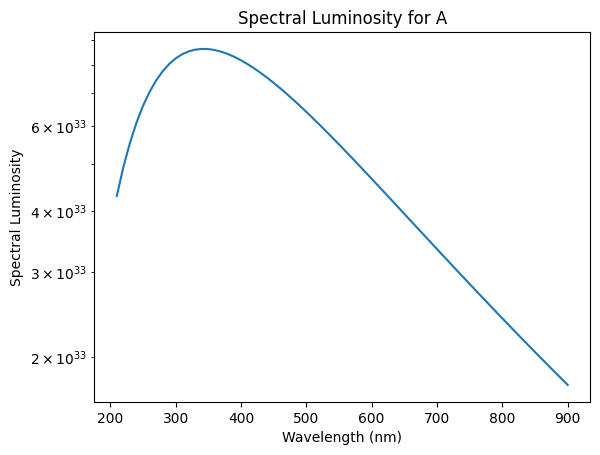

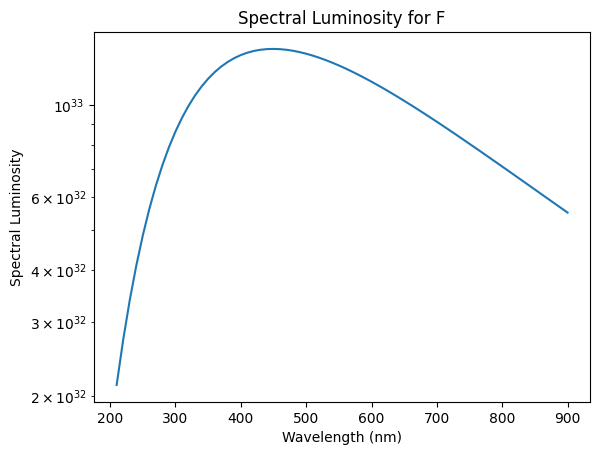

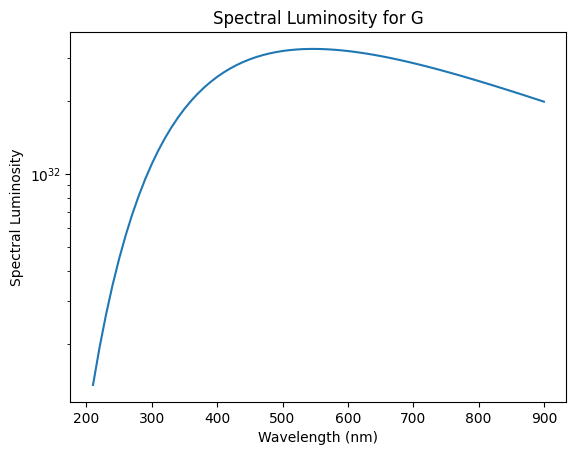

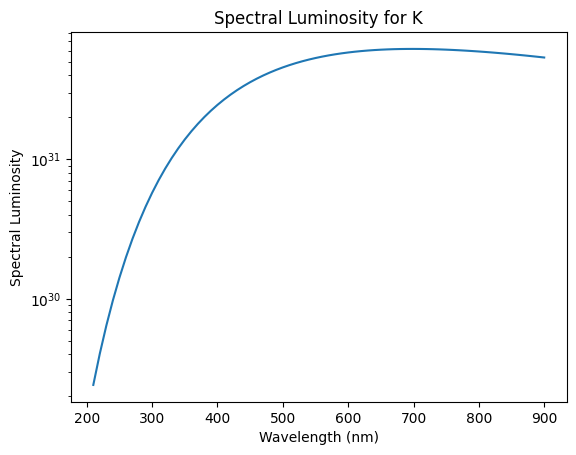

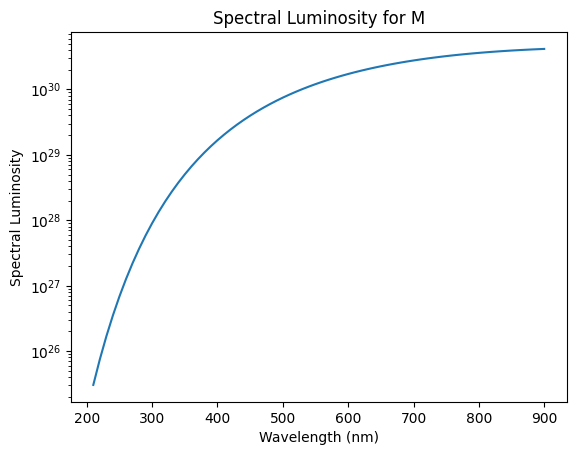

In [30]:
for j in range(7):
    name = names[j]
    plt.plot(wavelengths, L_astropy[j])
    plt.yscale('log')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Luminosity')
    plt.title(f"Spectral Luminosity for {name}")
    plt.show()


## Compare the performance of these three methods
Add the `%%timeit` magic command at the top of each calculation cell to see how long it takes to run. Which is fastest? Which is most convenient?

Now increase the number of wavelength samples you are using by a factor of 10. How does this change your timing results?

In reality, which one would you use if you had to do this calculation for 7 stars? Which one would you use if you had to do this calculation for a billion stars (the size of the Gaia catalog)?

Math time:Didnt work for same reason, when i add the line it brings up "dimensionless errors"\n
NP Time:Didnt work for same reason, when i add the line it brings up "dimensionless errors"\n
Astro time:2.48 ms ± 61.2 μs per loop for normal resolution
\n
When i increased the resolution for astropy it increased very slights ==> 2.65 ms ± 90 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
\n
Realistically the astro py version is a lot more convenient as it is much easy to deal with units . Since the %%timeit line crashed my array and list methods I have no way to know if thewy'd be better for a billion stars but i suspect the added functionality and ease of use of astropy will cause it to be slower than numpy on large datasets.

## Save your results using an Astropy Table

In [ ]:
from astropy.table import Table

In [43]:

data_columns = [wavelengths] + [L_astropy[i] for i in range(7)]
column_names = ['wavelength', 'O', 'B', 'A', 'F', 'G', 'K', 'M']

table = Table(data_columns, names=column_names)

table  # look at the results

wavelength,O,B,A,F,G,K,M
nm,J / (m s),J / (m s),J / (m s),J / (m s),J / (m s),J / (m s),J / (m s)
float64,float64,float64,float64,float64,float64,float64,float64
900.0,1.9814716945974273e+33,5.493774201631946e+34,1.7518947826664773e+33,5.512847018631148e+32,1.9850241570259742e+32,5.351229985318565e+31,4.1577905923904895e+30
899.0,1.9823135558974874e+33,5.515459500981088e+34,1.7573007119761426e+33,5.526920886676024e+32,1.989059767673199e+32,5.357553321548642e+31,4.153938061081824e+30
898.0,1.983145910207164e+33,5.537251185234092e+34,1.7627261340612293e+33,5.541032039884979e+32,1.9931014687009164e+32,5.363867197372098e+31,4.150055347738756e+30
897.0,1.9839686975399525e+33,5.5591498765696165e+34,1.7681711244519066e+33,5.5551805468609e+32,1.9971492425782554e+32,5.370171465486327e+31,4.1461424006436e+30
896.0,1.98478185772231e+33,5.581156201379177e+34,1.7736357589498447e+33,5.56936647590819e+32,2.0012030714593853e+32,5.376465977645216e+31,4.142199168568838e+30
895.0,1.9855853303942974e+33,5.603270790299457e+34,1.7791201136286306e+33,5.5835898950265026e+32,2.0052629371806582e+32,5.382750584655332e+31,4.1382256007831844e+30
894.0,1.9863790550102257e+33,5.625494278244858e+34,1.7846242648341747e+33,5.597850871904385e+32,2.0093288212577232e+32,5.389025136372051e+31,4.134221647057618e+30
893.0,1.9871629708393527e+33,5.647827304440406e+34,1.7901482891851227e+33,5.6121494739129345e+32,2.0134007048826444e+32,5.395289481695784e+31,4.130187257671528e+30


In [45]:
table.write('stellar_spectra.ecsv', format='ascii.ecsv')


In [47]:
table2 = Table.read('stellar_spectra.ecsv', format='ascii.ecsv')
table2  

wavelength,O,B,A,F,G,K,M
nm,J / (m s),J / (m s),J / (m s),J / (m s),J / (m s),J / (m s),J / (m s)
float64,float64,float64,float64,float64,float64,float64,float64
900.0,1.9814716945974273e+33,5.493774201631946e+34,1.7518947826664773e+33,5.512847018631148e+32,1.9850241570259742e+32,5.351229985318565e+31,4.1577905923904895e+30
899.0,1.9823135558974874e+33,5.515459500981088e+34,1.7573007119761426e+33,5.526920886676024e+32,1.989059767673199e+32,5.357553321548642e+31,4.153938061081824e+30
898.0,1.983145910207164e+33,5.537251185234092e+34,1.7627261340612293e+33,5.541032039884979e+32,1.9931014687009164e+32,5.363867197372098e+31,4.150055347738756e+30
897.0,1.9839686975399525e+33,5.5591498765696165e+34,1.7681711244519066e+33,5.5551805468609e+32,1.9971492425782554e+32,5.370171465486327e+31,4.1461424006436e+30
896.0,1.98478185772231e+33,5.581156201379177e+34,1.7736357589498447e+33,5.56936647590819e+32,2.0012030714593853e+32,5.376465977645216e+31,4.142199168568838e+30
895.0,1.9855853303942974e+33,5.603270790299457e+34,1.7791201136286306e+33,5.5835898950265026e+32,2.0052629371806582e+32,5.382750584655332e+31,4.1382256007831844e+30
894.0,1.9863790550102257e+33,5.625494278244858e+34,1.7846242648341747e+33,5.597850871904385e+32,2.0093288212577232e+32,5.389025136372051e+31,4.134221647057618e+30
893.0,1.9871629708393527e+33,5.647827304440406e+34,1.7901482891851227e+33,5.6121494739129345e+32,2.0134007048826444e+32,5.395289481695784e+31,4.130187257671528e+30
